<a href="https://colab.research.google.com/github/zwt4pb/dsprojectjterm2/blob/main/aysha_exploratory_%26sentimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

example request for genius

https://api.genius.com/oauth/authorize?
client_id=YOUR_CLIENT_ID&
redirect_uri=YOUR_REDIRECT_URI&
scope=REQUESTED_SCOPE&
state=SOME_STATE_VALUE&
response_type=code

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GENIUS_AC.env to GENIUS_AC.env


In [ ]:
!pip install python-dotenv

In [ ]:
!ls

GENIUS_AC.env  sample_data


In [ ]:
from dotenv import load_dotenv
import os

# Load the .env file
load_dotenv("GENIUS_AC.env")

# Access the token
GENIUS_ACCESS_TOKEN = os.getenv("GENIUS_ACCESS_TOKEN")
print(f"Your Genius Access Token is: {GENIUS_ACCESS_TOKEN}")

Your Genius Access Token is: 7WP7PD24CrKYOAeQSpSpSCDSjbeIrw1Whtrk_QMPJSVMcsuwWRbgohWwK4uqI-JZ


In [ ]:
import pandas as pd
streamed_df = pd.read_csv ("/content/sorted_streaming_data (1).csv")
weeknd = streamed_df[streamed_df['artist_name']== "The Weeknd"]
weeknd.head()

,artist_name,song_name,streams
0,The Weeknd,Blinding Lights,"4,646,503,363"
1,The Weeknd,Starboy,"3,673,471,314"
5,The Weeknd,Die For You,"2,594,175,849"
6,The Weeknd,The Hills,"2,522,521,678"
9,The Weeknd,Save Your Tears,"2,219,167,728"


In [ ]:
# prompt: save this weeknd dataset as a csv

weeknd.to_csv('the_weeknd_songs.csv', index=False)

<ipython-input-32-c0d2dadd32b1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='streams', y='song_name', data=top_songs, palette="viridis")  # assign to ax


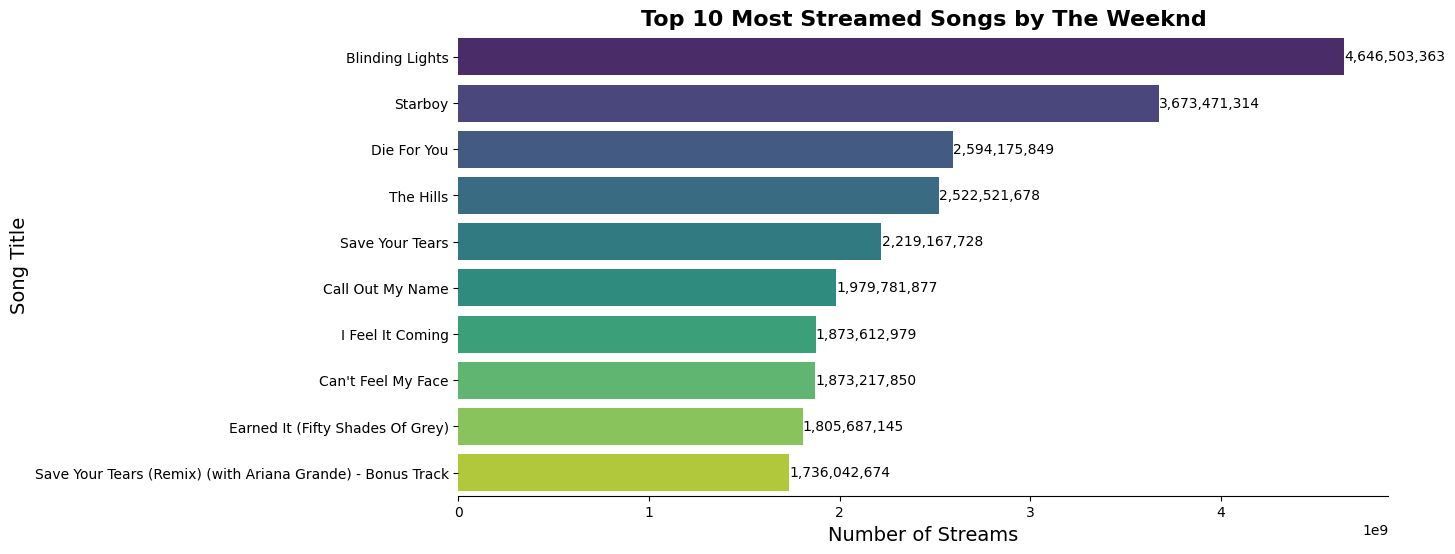

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Load data and filter for The Weeknd
streamed_df = pd.read_csv("/content/sorted_streaming_data (1).csv")
weeknd = streamed_df[streamed_df['artist_name'] == "The Weeknd"].copy()
# convert to int
weeknd['streams'] = pd.to_numeric(weeknd['streams'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

# Get top N songs
top_n = 10
top_songs = weeknd.sort_values(by='streams', ascending=False).head(top_n)

# Bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='streams', y='song_name', data=top_songs, palette="viridis")  # assign to ax
plt.title(f"Top {top_n} Most Streamed Songs by The Weeknd", fontsize=16, fontweight='bold')
plt.xlabel("Number of Streams", fontsize=14)
plt.ylabel("Song Title", fontsize=14)

# Remove the top, right, and left spines
sns.despine(top=True, right=True, left=True, bottom=False)

# Add the stream values at the end of each bar
for i, v in enumerate(top_songs['streams']):
    ax.text(v + 1000000, i, f"{v:,.0f}", va='center', fontsize=10)  # :,.0f will add commas and 0 decimal places

plt.show()

exploring streams dataset


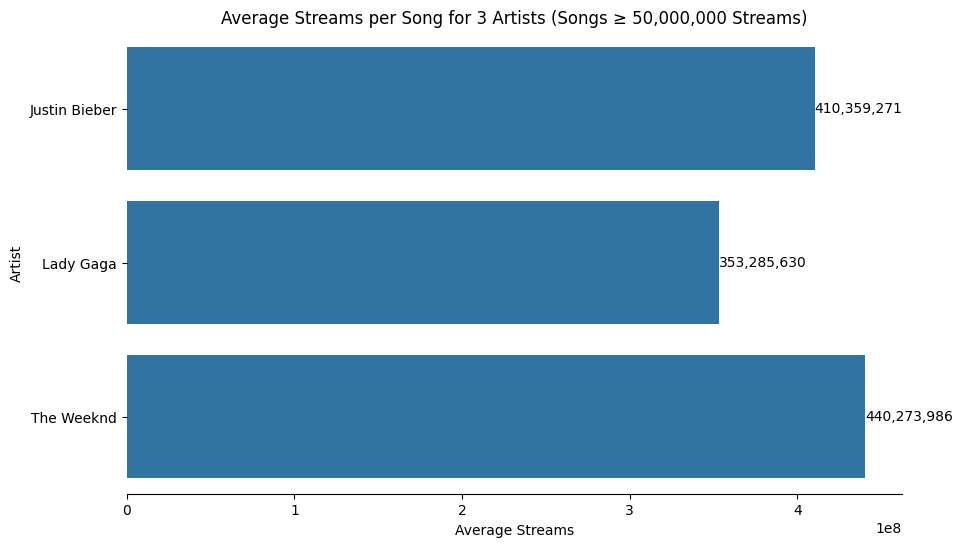

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read in the streaming data
streamed_df = pd.read_csv("/content/sorted_streaming_data (1).csv")

# Filter the dataset to include only songs with a minimum threshold of streams (e.g., 50 million)
threshold = 50_000_000

# Check the data type of the 'streams' column before attempting string operations
if streamed_df['streams'].dtype == 'object':
    # If it's an object (likely string), perform string operations
    streamed_df['streams'] = pd.to_numeric(streamed_df['streams'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)
elif streamed_df['streams'].dtype in ['int64', 'float64']:
    # if it is already numeric, do not perform string operations
    streamed_df['streams'] = pd.to_numeric(streamed_df['streams'], errors='coerce').fillna(0).astype(int)
else:
    # if it is another data type throw an error.
    raise TypeError("streams column is not of string or numeric type")

# Filter data
filtered_data = streamed_df[streamed_df['streams'] >= threshold]

# Get the top 5 artists based on total streams
top_5_artists = filtered_data.groupby('artist_name')['streams'].sum().nlargest(5).index
top_5_data = filtered_data[filtered_data['artist_name'].isin(top_5_artists)]

# Calculate average streams per song for the top 5 artists
average_streams = top_5_data.groupby('artist_name')['streams'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_streams.values, y=average_streams.index, orient='h')
plt.title(f'Average Streams per Song for 3 Artists (Songs ≥ {threshold:,} Streams)')
plt.xlabel('Average Streams')
plt.ylabel('Artist')

# Remove the top, right, and left spines
sns.despine(top=True, right=True, left=True, bottom= False)

# Add the average stream values at the end of each bar
for i, v in enumerate(average_streams.values):
    ax.text(v + 0.3, i, f"{v:,.0f}", va='center')  # :,.0f will add commas and 0 decimal places

plt.show()

fetch title then lyrics


In [ ]:
search_url = "https://api.genius.com/search"
params = {"q": "The Weeknd"}
response = requests.get(search_url, headers={"Authorization": f"Bearer {GENIUS_ACCESS_TOKEN}"}, params=params)
print(response.json())


{'meta': {'status': 200}, 'response': {'hits': [{'highlights': [], 'index': 'song', 'type': 'song', 'result': {'annotation_count': 12, 'api_path': '/songs/727466', 'artist_names': 'The Weeknd', 'full_title': 'The Hills by\xa0The\xa0Weeknd', 'header_image_thumbnail_url': 'https://images.genius.com/3c9c680375fd63ba2734075225832456.300x300x1.jpg', 'header_image_url': 'https://images.genius.com/3c9c680375fd63ba2734075225832456.1000x1000x1.jpg', 'id': 727466, 'lyrics_owner_id': 104344, 'lyrics_state': 'complete', 'path': '/The-weeknd-the-hills-lyrics', 'primary_artist_names': 'The Weeknd', 'pyongs_count': 1803, 'relationships_index_url': 'https://genius.com/The-weeknd-the-hills-sample', 'release_date_components': {'year': 2015, 'month': 5, 'day': 27}, 'release_date_for_display': 'May 27, 2015', 'release_date_with_abbreviated_month_for_display': 'May 27, 2015', 'song_art_image_thumbnail_url': 'https://images.genius.com/3c9c680375fd63ba2734075225832456.300x300x1.jpg', 'song_art_image_url': 'h

In [ ]:
search_url = "https://api.genius.com/search"
params = {"q": "The Weeknd"}
headers = {"Authorization": f"Bearer {GENIUS_ACCESS_TOKEN}"}

response = requests.get(search_url, headers=headers, params=params)
data = response.json()

# Print the artist ID
for hit in data['response']['hits']:
    print(hit['result']['primary_artist']['name'], "-", hit['result']['primary_artist']['id'])


The Weeknd - 2358
The Weeknd - 2358
The Weeknd - 2358
The Weeknd - 2358
The Weeknd - 2358
The Weeknd - 2358
The Weeknd - 2358
The Weeknd - 2358
The Weeknd - 2358
The Weeknd - 2358


need to do it for top 100 WITHOUT duplicates (of remixes, radio edits and such)

In [ ]:
# Reload the dataset after re-upload
file_path = '/content/the_weeknd_songs.csv'
weeknd_songs_df = pd.read_csv(file_path)

# Inspect the dataset's first few rows
weeknd_songs_df.head()

# Check if it has columns for title and streams
if 'song_name' in weeknd_songs_df.columns and 'streams' in weeknd_songs_df.columns:
    # Drop duplicates based on the 'title', keeping the one with the highest streams
    most_streamed_songs = weeknd_songs_df.loc[weeknd_songs_df.groupby('song_name')['streams'].idxmax()]

    # Sort by streams in descending order
    most_streamed_songs = most_streamed_songs.sort_values(by='streams', ascending=False)

    # Select the top 100 songs
    top_100_songs = most_streamed_songs.head(100)

    # Display the resulting dataset
    top_100_songs.head()

    # Save the filtered dataset to a new CSV file
    top_100_songs.to_csv('/content/top_100_weeknd_songs.csv', index=False)
    print("Filtered top 100 songs saved as 'top_100_weeknd_songs.csv'")
else:
    print("The dataset does not contain the required 'title' or 'streams' columns.")


Filtered top 100 songs saved as 'top_100_weeknd_songs.csv'


In [ ]:
file_path = '/content/top_100_weeknd_songs.csv'
top100_df = pd.read_csv(file_path)

from bs4 import BeautifulSoup
import requests
import re

GENIUS_ACCESS_TOKEN = os.getenv("GENIUS_ACCESS_TOKEN")  # Ensure the token is loaded

def fetch_lyrics(song_title):
    base_url = "https://api.genius.com"
    headers = {"Authorization": f"Bearer {GENIUS_ACCESS_TOKEN}"}
    search_url = f"{base_url}/search"
    params = {"q": song_title}

    response = requests.get(search_url, headers=headers, params=params)
    if response.status_code != 200:
        print(f"Failed to search for {song_title}: {response.status_code}")
        return None

    data = response.json()
    hits = data['response']['hits']
    for hit in hits:
        if "The Weeknd" in hit['result']['primary_artist']['name']:
            song_url = hit['result']['url']
            song_response = requests.get(song_url)
            if song_response.status_code != 200:
                print(f"Failed to fetch lyrics for {song_title}: {song_response.status_code}")
                return None

            soup = BeautifulSoup(song_response.text, 'html.parser')
            lyrics_divs = soup.find_all("div", {"data-lyrics-container": "true"})
            if lyrics_divs:
                lyrics = "\n".join([div.get_text(separator="\n") for div in lyrics_divs])
                # Clean lyrics by removing annotations like [Chorus], [Verse]
                lyrics = re.sub(r'\[.*?\]', '', lyrics)
                return lyrics.strip()

    print(f"No lyrics found for {song_title}")
    return None


sentiment analysis

In [ ]:
from textblob import TextBlob

# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
results = []

# Loop through each song and process it
for index, row in top100_df.iterrows():
    song_title = row['song_name']  # Replace with the correct column name for titles
    print(f"Processing: {song_title}")

    # Fetch lyrics
    lyrics = fetch_lyrics(song_title)
    if lyrics:
        # Analyze sentiment
        sentiment_score = analyze_sentiment(lyrics)
        # Categorize sentiment
        if sentiment_score > 0:
            sentiment_category = "Positive"
        elif sentiment_score < 0:
            sentiment_category = "Negative"
        else:
            sentiment_category = "Neutral"

        # Add to results
        results.append({
            "Title": song_title,
            "Lyrics": lyrics,
            "Sentiment Score": sentiment_score,
            "Sentiment Category": sentiment_category
        })
    else:
        # Handle missing lyrics
        results.append({
            "Title": song_title,
            "Lyrics": None,
            "Sentiment Score": None,
            "Sentiment Category": None
        })

# Convert results to a DataFrame
processed_df = pd.DataFrame(results)


Processing: Blinding Lights
Processing: Starboy
Processing: Die For You
Processing: The Hills
Processing: Save Your Tears
Processing: Call Out My Name
Processing: I Feel It Coming
Processing: Can't Feel My Face
Processing: Earned It (Fifty Shades Of Grey)
Processing: Save Your Tears (Remix) (with Ariana Grande) - Bonus Track
No lyrics found for Save Your Tears (Remix) (with Ariana Grande) - Bonus Track
Processing: One Of The Girls (with JENNIE, Lily Rose Depp)
Processing: Creepin'
No lyrics found for Creepin'
Processing: Stargirl Interlude
Processing: Reminder
Processing: I Was Never There
Processing: Often
Processing: After Hours
Processing: Heartless
Processing: Die For You (with Ariana Grande) - Remix
Processing: Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mustard) - Remix
No lyrics found for Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mustard) - Remix
Processing: Lost in the Fire (feat. The Weeknd)
Processing: Moth To A Flame (with The Weeknd)
No lyrics found for Moth To A Flame (wit

In [ ]:
no_lyrics_count = processed_df['Lyrics'].isnull().sum()

print(f"Number of songs with no lyrics found: {no_lyrics_count}")

songs_with_no_lyrics = processed_df[processed_df['Lyrics'].isnull()]['Title'].tolist()

print("Songs with no lyrics found:")
for song in songs_with_no_lyrics:
    print(song)

Number of songs with no lyrics found: 20
Songs with no lyrics found:
Save Your Tears (Remix) (with Ariana Grande) - Bonus Track
Creepin'
Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mustard) - Remix
Moth To A Flame (with The Weeknd)
Love Me Harder
You Right
LA FAMA
Smile (with The Weeknd)
Take My Breath - Single Version
Hurricane
Some Way
Lust for Life (with The Weeknd)
HawÃ¡i - Remix
K-POP
Over Now (with The Weeknd)
Power is Power (feat. The Weeknd & Travis Scott)
off the table (with The Weeknd)
Curve (feat. The Weeknd)
Angel
Missed You - Bonus Track


In [ ]:
!pip install lyricsgenius


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
import lyricsgenius
import pandas as pd
from dotenv import load_dotenv
import os

# Load the Genius API access token from the .env file
load_dotenv()
GENIUS_ACCESS_TOKEN = os.getenv("GENIUS_ACCESS_TOKEN")

if not GENIUS_ACCESS_TOKEN:
    raise ValueError("Genius API token not found. Make sure it is correctly set in your .env file.")

# Initialize Genius API with the loaded token
genius = lyricsgenius.Genius(GENIUS_ACCESS_TOKEN)

# List of songs to fetch lyrics for
songs_with_no_lyrics = [
    "Save Your Tears (Remix) (with Ariana Grande) - Bonus Track",
    "Creepin'",
    "Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mustard) - Remix",
    "Moth To A Flame (with The Weeknd)",
    "Love Me Harder",
    "You Right",
    "LA FAMA",
    "Smile (with The Weeknd)",
    "Take My Breath - Single Version",
    "Hurricane",
    "Some Way",
    "Lust for Life (with The Weeknd)",
    "Hawái - Remix",
    "K-POP",
    "Over Now (with The Weeknd)",
    "Power is Power (feat. The Weeknd & Travis Scott)",
    "off the table (with The Weeknd)",
    "Curve (feat. The Weeknd)",
    "Angel",
    "Missed You - Bonus Track"
]

# Initialize a dictionary to store results
fetched_lyrics = []

# Loop through songs and fetch lyrics
for song_title in songs_with_no_lyrics:
    try:
        print(f"Fetching lyrics for: {song_title}")
        song = genius.search_song(song_title, artist="The Weeknd")  # Replace "The Weeknd" if needed
        if song:
            fetched_lyrics.append({"Title": song_title, "Lyrics": song.lyrics})
        else:
            fetched_lyrics.append({"Title": song_title, "Lyrics": "No Lyrics Found"})
    except Exception as e:
        print(f"Error fetching lyrics for {song_title}: {e}")
        fetched_lyrics.append({"Title": song_title, "Lyrics": "Error Fetching Lyrics"})

# Convert results to a DataFrame
fetched_lyrics_df = pd.DataFrame(fetched_lyrics)

# Save to CSV
fetched_lyrics_df.to_csv("fetched_missing_lyrics.csv", index=False)
print("Lyrics saved to 'fetched_missing_lyrics.csv'")


Fetching lyrics for: Save Your Tears (Remix) (with Ariana Grande) - Bonus Track
Searching for "Save Your Tears (Remix) (with Ariana Grande) - Bonus Track" by The Weeknd...
No results found for: 'Save Your Tears (Remix) (with Ariana Grande) - Bonus Track The Weeknd'
Fetching lyrics for: Creepin'
Searching for "Creepin'" by The Weeknd...
Done.
Fetching lyrics for: Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mustard) - Remix
Searching for "Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mustard) - Remix" by The Weeknd...
Done.
Fetching lyrics for: Moth To A Flame (with The Weeknd)
Searching for "Moth To A Flame (with The Weeknd)" by The Weeknd...
No results found for: 'Moth To A Flame (with The Weeknd) The Weeknd'
Fetching lyrics for: Love Me Harder
Searching for "Love Me Harder" by The Weeknd...
Done.
Fetching lyrics for: You Right
Searching for "You Right" by The Weeknd...
Done.
Fetching lyrics for: LA FAMA
Searching for "LA FAMA" by The Weeknd...
Done.
Fetching lyrics for: Smile (with The We

In [ ]:
# prompt: put together the sentimental anaysis from the fetched lyrics of processed_df, with the sentimental analysis for fetched_lyrics_df

# Analyze sentiment for fetched lyrics
results_fetched = []
for index, row in fetched_lyrics_df.iterrows():
    lyrics = row['Lyrics']
    title = row['Title']
    if lyrics and lyrics != "No Lyrics Found" and lyrics != "Error Fetching Lyrics":
        sentiment_score = analyze_sentiment(lyrics)
        if sentiment_score > 0:
            sentiment_category = "Positive"
        elif sentiment_score < 0:
            sentiment_category = "Negative"
        else:
            sentiment_category = "Neutral"
        results_fetched.append({
            "Title": title,
            "Lyrics": lyrics,
            "Sentiment Score": sentiment_score,
            "Sentiment Category": sentiment_category
        })
    else:
        results_fetched.append({
            "Title": title,
            "Lyrics": lyrics,
            "Sentiment Score": None,
            "Sentiment Category": None
        })

fetched_sentiment_df = pd.DataFrame(results_fetched)

# Combine the two DataFrames
combined_df = pd.concat([processed_df, fetched_sentiment_df], ignore_index=True)

for index, row in combined_df.iterrows():
    if pd.isnull(row['Lyrics']):
        # Find rows with the same title at the bottom of the DataFrame
        matching_rows = combined_df[combined_df['Title'] == row['Title']].iloc[1:]
        # If a matching row with lyrics exists
        if not matching_rows.empty:
            # Select the first match (assuming it has lyrics and sentiment)
            matching_row = matching_rows.iloc[0]
            # Update current row with lyrics and sentiment
            combined_df.loc[index, 'Lyrics'] = matching_row['Lyrics']
            combined_df.loc[index, 'Sentiment Score'] = matching_row['Sentiment Score']
            combined_df.loc[index, 'Sentiment Category'] = matching_row['Sentiment Category']

            # Remove the redundant row at the bottom
            combined_df.drop(matching_rows.index, inplace = True)
            combined_df = combined_df.reset_index(drop=True)

# Display or save the combined DataFrame
print(combined_df.head())
combined_df.to_csv('weeknd_combined_sentiment_analysis.csv', index=False)

             Title                                             Lyrics  \
0  Blinding Lights  Yeah\n\nI've been tryna call\nI've been on my ...   
1          Starboy  Ayy\n\nI'm tryna put you in the worst mood, ah...   
2      Die For You  I'm findin' ways to articulate the feelin' I'm...   
3        The Hills  Yeah\nYeah\nYeah\n\nYour man on the road, he d...   
4  Save Your Tears  Ooh\nNa-na, yeah\n\nI saw you dancing in a cro...   

   Sentiment Score Sentiment Category  
0         0.032143           Positive  
1         0.131546           Positive  
2         0.122995           Positive  
3        -0.032066           Negative  
4         0.137857           Positive  


#visualizations

In [ ]:
combined_df.head()

,Title,Lyrics,Sentiment Score,Sentiment Category
0,Blinding Lights,Yeah\n\nI've been tryna call\nI've been on my ...,0.032143,Positive
1,Starboy,"Ayy\n\nI'm tryna put you in the worst mood, ah...",0.131546,Positive
2,Die For You,I'm findin' ways to articulate the feelin' I'm...,0.122995,Positive
3,The Hills,"Yeah\nYeah\nYeah\n\nYour man on the road, he d...",-0.032066,Negative
4,Save Your Tears,"Ooh\nNa-na, yeah\n\nI saw you dancing in a cro...",0.137857,Positive


In [ ]:
processed_df.head()

,Title,Lyrics,Sentiment Score,Sentiment Category
0,Blinding Lights,Yeah\n\nI've been tryna call\nI've been on my ...,0.032143,Positive
1,Starboy,"Ayy\n\nI'm tryna put you in the worst mood, ah...",0.131546,Positive
2,Die For You,I'm findin' ways to articulate the feelin' I'm...,0.122995,Positive
3,The Hills,"Yeah\nYeah\nYeah\n\nYour man on the road, he d...",-0.032066,Negative
4,Save Your Tears,"Ooh\nNa-na, yeah\n\nI saw you dancing in a cro...",0.137857,Positive


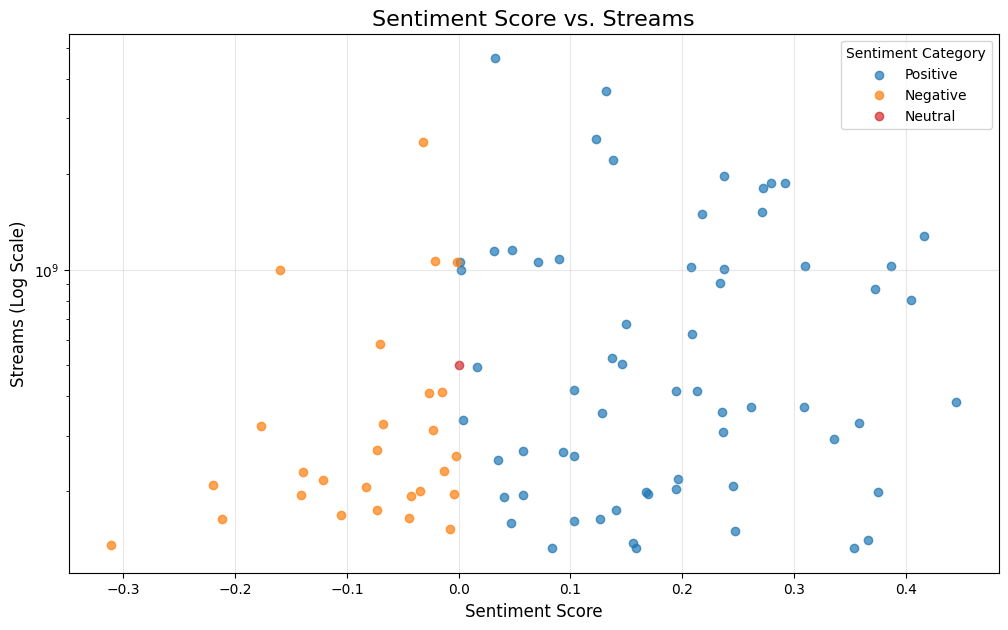

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Load the required dataframes
# combined_df = pd.read_csv("weeknd_combined_sentiment_analysis.csv") #this is already loaded in the notebook
# top100_df = pd.read_csv("/content/top_100_weeknd_songs.csv") #this is already loaded in the notebook

# Ensure that 'streams' is an numeric column in top100_df
top100_df['streams'] = pd.to_numeric(top100_df['streams'], errors='coerce')

# Ensure that combined_df has the correct columns
# print(combined_df.head())

# Rename the 'Title' column in the top100_df dataframe to 'song_name' to match the combined dataframe before merging
top100_df.rename(columns={'song_name': 'Title'}, inplace=True)

# Merge the datasets on song title
merged_df = pd.merge(combined_df, top100_df, on="Title", how="inner")
#merged_df = pd.merge(combined_df, top100_df, left_on="Title", right_on="Title", how="inner")


# Ensure numeric types for plotting
merged_df['Sentiment Score'] = pd.to_numeric(merged_df['Sentiment Score'], errors='coerce')
merged_df['streams'] = pd.to_numeric(merged_df['streams'], errors='coerce')

# **Visualization 1: Scatter Plot - Sentiment vs. Streams**
plt.figure(figsize=(12, 7))
for category in merged_df['Sentiment Category'].unique():
    subset = merged_df[merged_df['Sentiment Category'] == category]
    plt.scatter(subset['Sentiment Score'], subset['streams'], label=category, alpha=0.7)

plt.title('Sentiment Score vs. Streams', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Streams (Log Scale)', fontsize=12)
plt.yscale('log')  # Optional: Use log scale if stream values vary greatly
plt.legend(title='Sentiment Category')
plt.grid(alpha=0.3)
plt.show()

this plots where each of the Weeknd's top 100 songs falls based on how many streams it gets as well as the sentiment score that is assigned to the lyrics it has. this specifically shows that higher sentiment scores have a wider spread in streams but his positive songs have a bit more popularity. Conversly, negative sentiment songs appear to have a narrower spread of streams